In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("referral.csv")
df.head()

,user_id,date,country,money_spent,is_referral,device_id
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH


In [3]:
% matplotlib inline
import matplotlib.pyplot as plt


In [4]:
df['dataframe'] = pd.to_datetime(df['date'], format='%Y-%m-%d ')

In [5]:
df_class0 = df[df['is_referral'] == 0]
df_class1 = df[df['is_referral'] == 1]

In [6]:
#plt.plot(df['date'], df['money_spent'], '-')
#_ = plt.xticks(rotation=45)

In [7]:
date_unique = df['date'].unique()
date_unique[:2]

array(['2015-10-03', '2015-10-04'], dtype=object)

In [8]:
counts_by_date0 =df_class0[['date']].groupby(['date']).size()
counts_by_date1 =df_class1[['date']].groupby(['date']).size()

first_referral= counts_by_date1.index[0]
print(first_referral)
counts_by_date1[:2]

2015-10-31


date
2015-10-31    1810
2015-11-01    1749
dtype: int64

In [9]:
from datetime import datetime

#datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

datetime_first_referral = datetime.strptime(first_referral,'%Y-%m-%d')

cum_sum = pd.DataFrame(columns=['date','datetime','class 0','class 1'])

counts0 = 0
counts1 = 0
for date in date_unique:
    # Include only observations from after the first referral and on:
    datetime_str = datetime.strptime(date,'%Y-%m-%d')

    if datetime_str >= datetime_first_referral:
        try:
            counts0  = counts0 + counts_by_date0[date]
        except:
            continue
        try:
            counts1  = counts1 + counts_by_date1[date]
        except:
            continue
    
        newrow = {'date':date,'datetime':datetime_str,'class 0':counts0,'class 1':counts1}
        cum_sum.loc[len(cum_sum.values)]=newrow

    
#cum_sum['datastamp'] = cum_sum.to_datetime(cum_sum['date'], format='%Y-%m-%d')
cum_sum.head(10)


,date,datetime,class 0,class 1
0,2015-10-31,2015-10-31,1423,1810
1,2015-11-01,2015-11-01,2836,3559
2,2015-11-02,2015-11-02,3357,4256
3,2015-11-03,2015-11-03,3930,4956
4,2015-11-04,2015-11-04,4450,5616
5,2015-11-05,2015-11-05,4991,6276
6,2015-11-06,2015-11-06,5508,6995
7,2015-11-07,2015-11-07,6854,8783
8,2015-11-08,2015-11-08,8271,10530
9,2015-11-09,2015-11-09,8783,11212


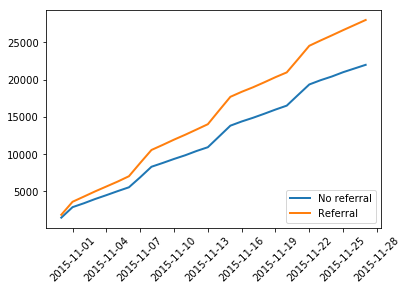

In [11]:
#plt.plot(cum_sum['datetime'], cum_sum['class 0'], '-')
#_ = plt.xticks(rotation=45)

dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off

fig, ax = plt.subplots()
line1, = ax.plot(cum_sum['datetime'], cum_sum['class 0'], linewidth = 2,
                 label='No referral')

line2, = ax.plot(cum_sum['datetime'], cum_sum['class 1'], linewidth = 2,
                 label='Referral')

plt.xticks(rotation=45)
ax.legend(loc='lower right')
plt.show()

In [12]:
cum_sum.tail(10)


,date,datetime,class 0,class 1
18,2015-11-18,2015-11-18,15398,19627
19,2015-11-19,2015-11-19,15965,20323
20,2015-11-20,2015-11-20,16493,20965
21,2015-11-21,2015-11-21,17925,22742
22,2015-11-22,2015-11-22,19341,24546
23,2015-11-23,2015-11-23,19915,25259
24,2015-11-24,2015-11-24,20413,25946
25,2015-11-25,2015-11-25,20992,26650
26,2015-11-26,2015-11-26,21488,27333
27,2015-11-27,2015-11-27,21983,28017
